Sageの練習を兼ねて移動平均フィルタの零点と周波数特性の関係を復習しました．

#  移動平均フィルタについて
移動平均フィルタとは，$n$サンプル目の入力を$x_{n}$，出力を$y_{n}$，フィルタ長を$N$とすると以下のように表すことができます．
$$y_{n} = \frac{1}{N}\sum_{m = 0}^{N} x_{n + m}$$
これは，連続する$N$サンプルの平均を出力とすることを意味しています．

今回は，零点と周波数特性の関係を調べたいので，上式にZ変換を行い周波数領域に持っていきます．
\begin{align}
\mathcal{Z}(x_{n+m}) & = z^{-m}X(z) \\
\mathcal{Z}(y_{n}) & = Y(z) \\
     & = H(z)X(z) \\
     & = \frac{1}{N} \left( \sum_{m = 0}^{N} z^{-m} \right) X(z) \\
\end{align}

# 複素平面上で零点を求める

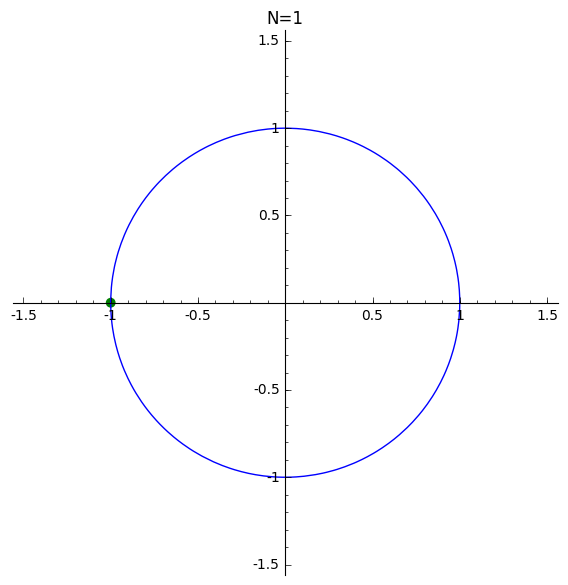

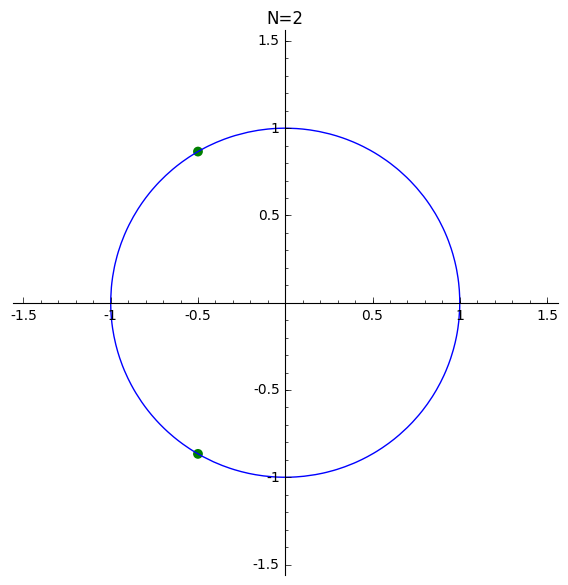

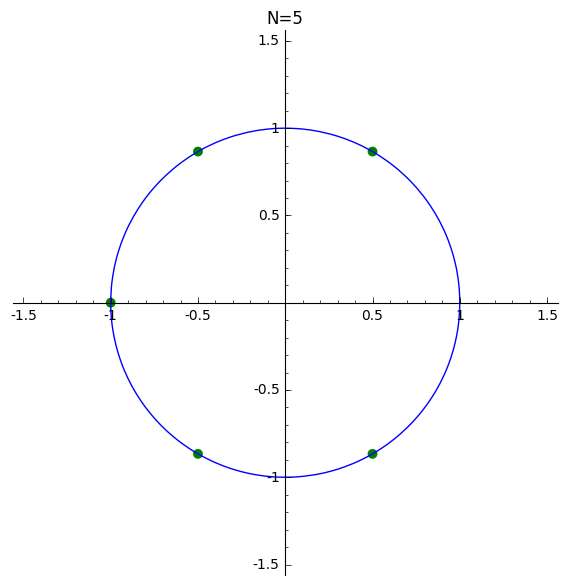

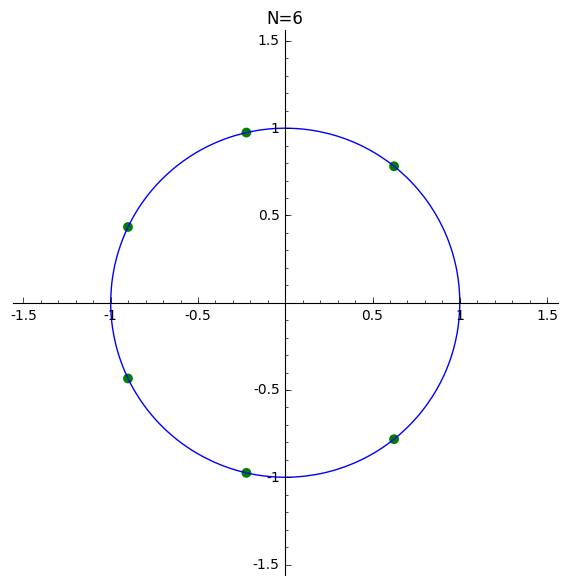

In [224]:
var('z t')
gen_mean_func = lambda N : (1 / N ) * reduce(lambda a,b: a + z^(-b), [0..N], 0)
get_roots = lambda f : [(s.rhs().real(), s.rhs().imag()) for s in solve(f,z, to_poly_solve = True) ]
circle = parametric_plot( (cos(t), sin(t)), (t, 0, 2*pi))
plots =[circle + points(get_roots(gen_mean_func(n)), color='green', pointsize=50, title='N=%s' % n) for n in [1,2,5,6]]
for p in plots:
    p.show(xmin=-1.5, xmax=1.5, ymin=-1.5, ymax = 1.5, aspect_ratio=1.0)

上図より以下のことが確認できます．
- 零点は単位円上にのみ存在する
- $z=-1$以外の零点は全て複素共役になっている


# 周波数特性を求める

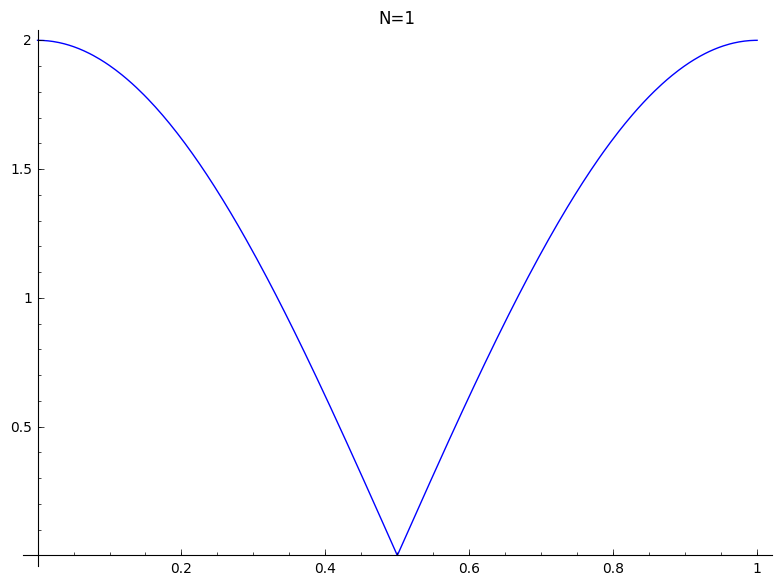

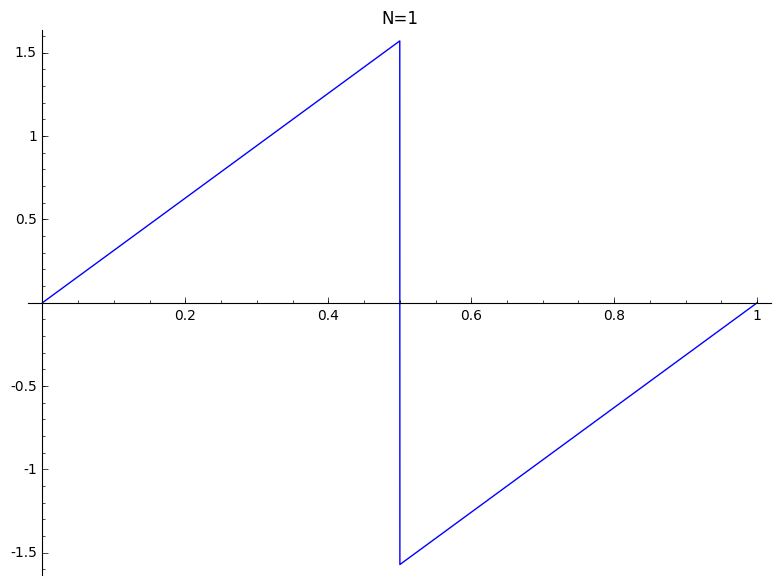

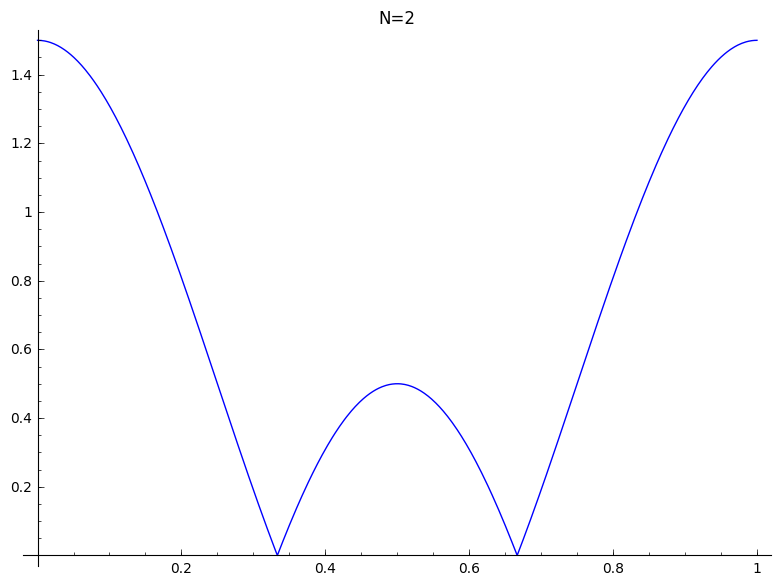

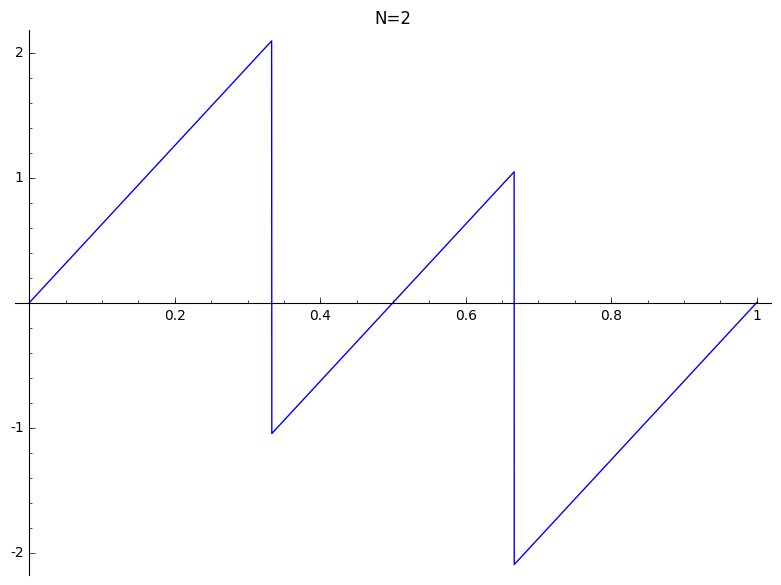

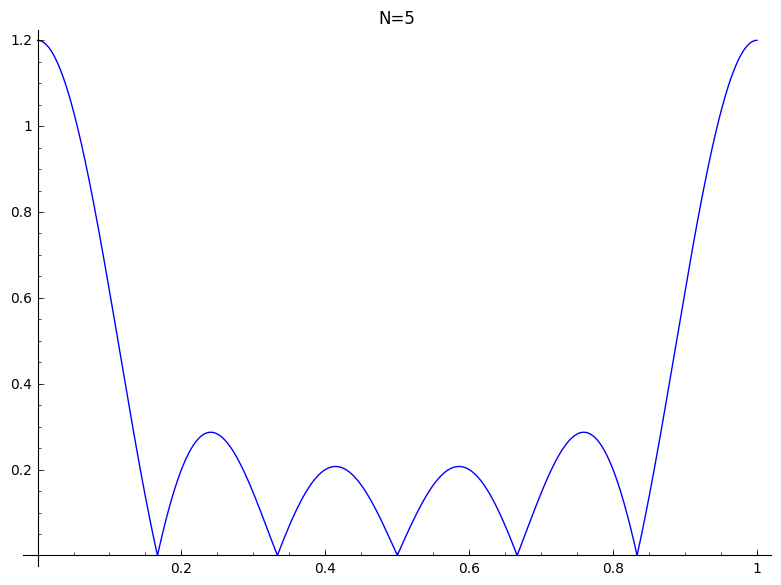

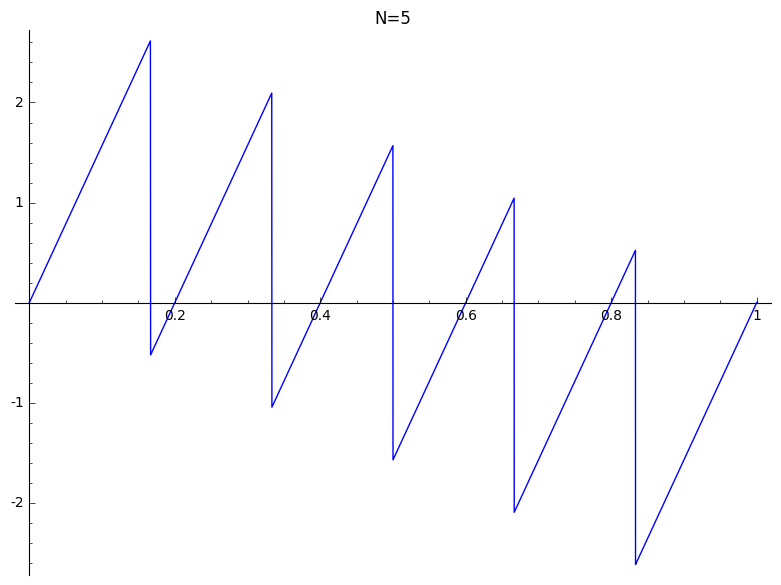

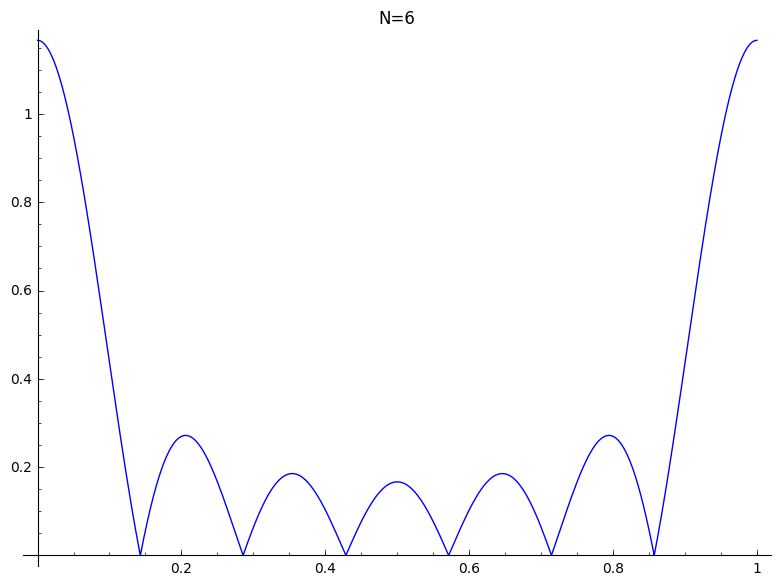

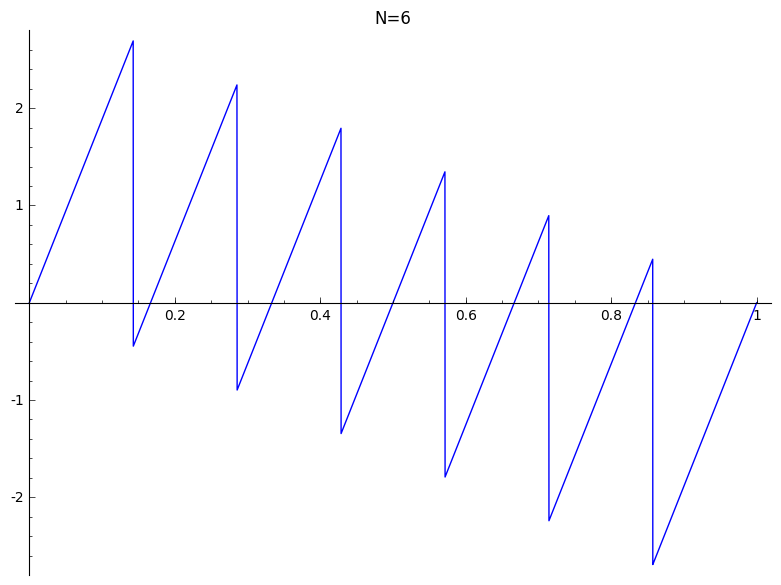

In [225]:
gen_abs_func = lambda mean_func : abs(mean_func)
gen_phase_func = lambda mean_func : atan2(mean_func.imag(), mean_func.real())
freq_func =[(gen_mean_func(n).subs(z = exp(-2*pi*i*t)),n) for n in [1,2,5,6]]
plots = [(plot(gen_abs_func(f),(t,0,1), title = 'N=%s' % n), plot(gen_phase_func(f),(t,0,1), title='N=%s'% n)) for (f,n) in freq_func ]
for p in plots:
    p[0].show()
    p[1].show()

上図より以下のことが確認できます．
- 低周波を通し，高周波をカットするローパスフィスタになっている
- 複素平面上で零点の存在する周波数は利得が小さい（カットされている）
- 直線位相となっている